In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**PROBLEM STATEMENT :**
Customers are exiting the bank.
**OBJECTIVE :**
Identifying the customers with a higher probability of leaving the bank.

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/DS_C12_S2_Classification_BankChurn_Data_Project.csv")
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [3]:
def whole():
    col = df.columns
    shape = df.shape
    dtyp = df.dtypes
    null = df.isnull().sum()
    info = df.info()
    desc = df.describe()
    for i in df:
        uniq = print(df[i].unique())
        
    for i in df:
        val_cnt = print(df[i].value_counts())
    
    return (col,shape,dtyp,null,info,desc,uniq,val_cnt)

In [4]:
whole()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
[619 608 502

(Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
        'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
        'EstimatedSalary', 'Exited'],
       dtype='object'),
 (10000, 13),
 CustomerId           int64
 Surname             object
 CreditScore          int64
 Geography           object
 Gender              object
 Age                  int64
 Tenure               int64
 Balance            float64
 NumOfProducts        int64
 HasCrCard            int64
 IsActiveMember       int64
 EstimatedSalary    float64
 Exited               int64
 dtype: object,
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 None,
          CustomerId   CreditScore           Age        Tenure        Balance  \


In [5]:
for i in ["france","fra"]:
    df["Geography"] = df["Geography"].replace([i],"France")
    
for i in ["espanio","spain"]:
    df["Geography"] = df["Geography"].replace([i],"Spain")
    
for i in ["ger","germany","gernamy","GERMANY"]:
    df["Geography"] = df["Geography"].replace([i],"Germany")
    
df["HasCrCard"] = df["HasCrCard"].replace([1],"Yes")
df["HasCrCard"] = df["HasCrCard"].replace([0],"No")
df["IsActiveMember"] = df["IsActiveMember"].replace([1],"Yes")
df["IsActiveMember"] = df["IsActiveMember"].replace([0],"No")
df["Exited"] = df["Exited"].replace([1],"Yes")
df["Exited"] = df["Exited"].replace([0],"No")

In [6]:
df = df.drop('Surname', axis='columns')
df = df.drop('CustomerId', axis='columns')

In [7]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

In [8]:
df2 = df.copy()

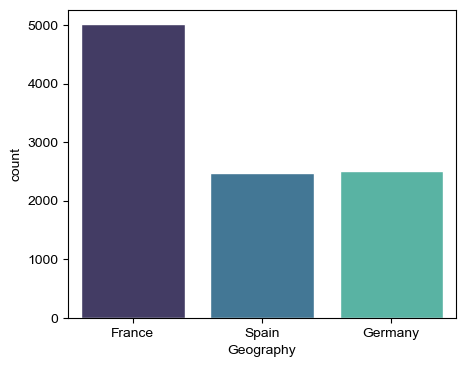

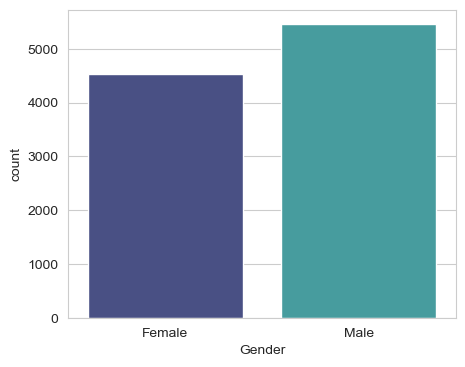

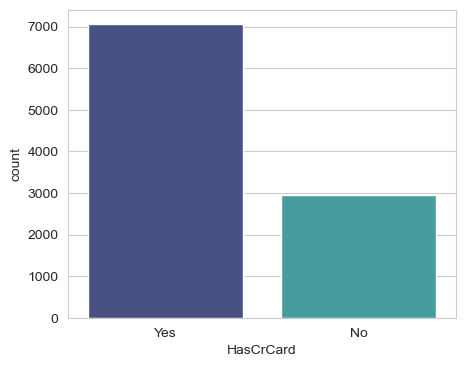

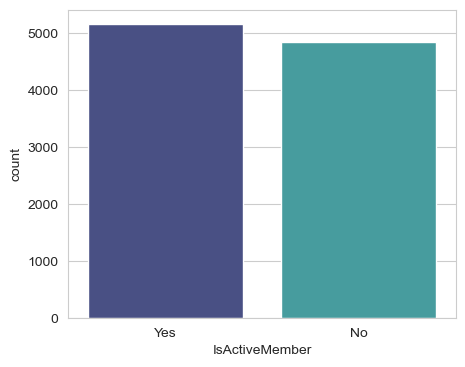

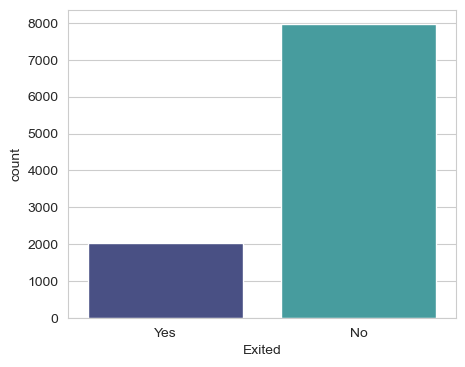

In [9]:
for i in cat:
    fig,ax = plt.subplots(figsize=(5,4))
    sns.set_style("whitegrid")
    sns.countplot(x = df[i], palette="mako")

**INTERPRETATION: Most of the customers are from France. Gender of the customers are almost balanced. More than 50% of the customers own a credit card. Wheather the customer is an active member or not is almost a balanced data. More than 50% of the customers have still not exited the bank.**

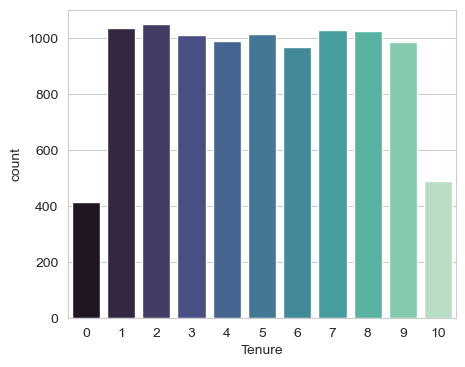

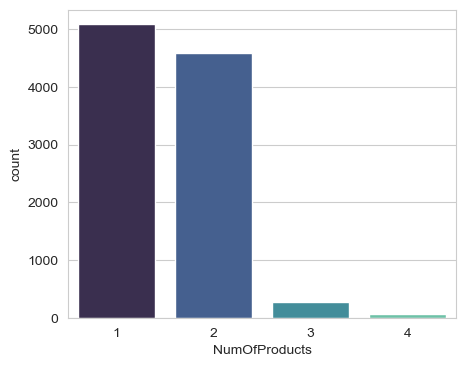

In [10]:
for i in ["Tenure","NumOfProducts"]:
    fig,ax = plt.subplots(figsize=(5,4))
    sns.set_style("whitegrid")
    sns.countplot(x = df[i], palette="mako")

**INTERPRETATION: Most of the customers have a tenure ranging between 1 and 9. Most of the customers have bought either 1 or 2 products.**   

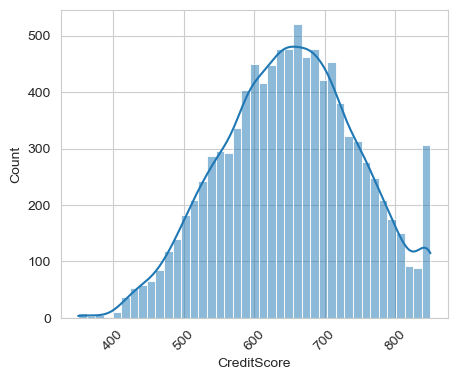

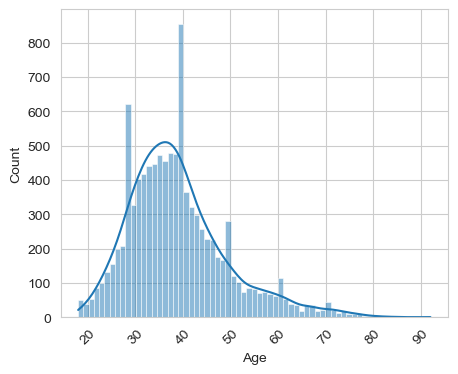

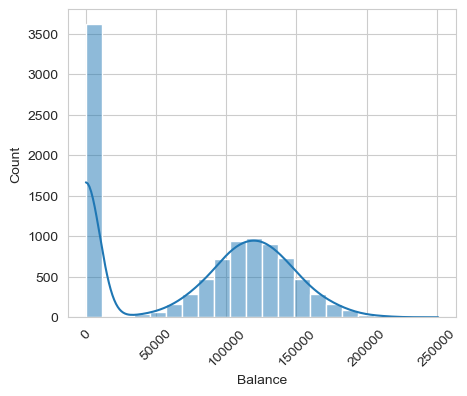

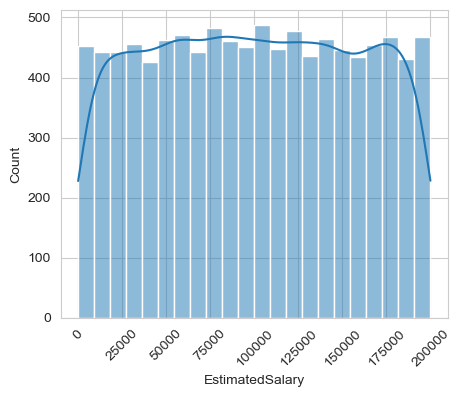

In [11]:
for i in ["CreditScore","Age","Balance","EstimatedSalary"]:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.set_style('whitegrid')
    sns.histplot(df[i], kde = 'True')
    plt.xticks(rotation=45)

**INTERPRETATION: Column Credit score is almost a normally distributed data. Column age is slightly left skewed. Column balance is a highly imbalanced data. Column estimated salary is a uniformly distributed data.** 

**IDENTIFYING PATTERN OF OUTLIERS USING BOXPLOT**

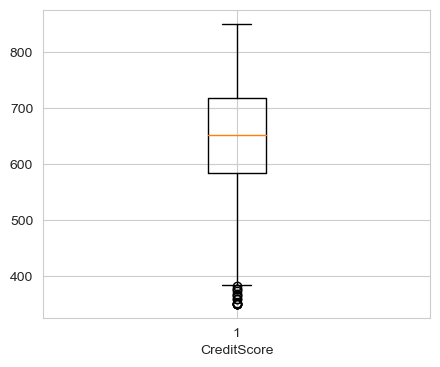

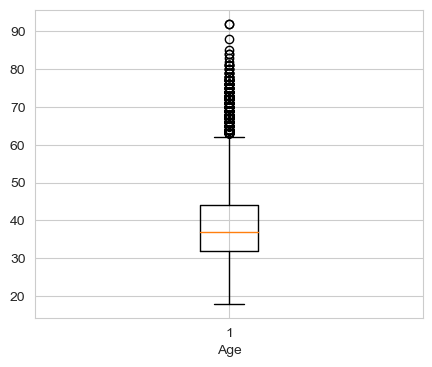

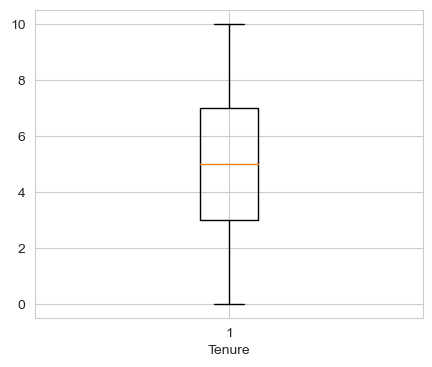

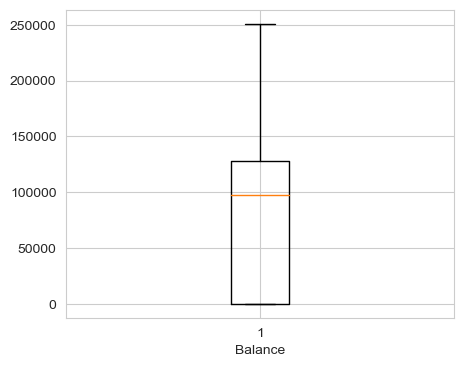

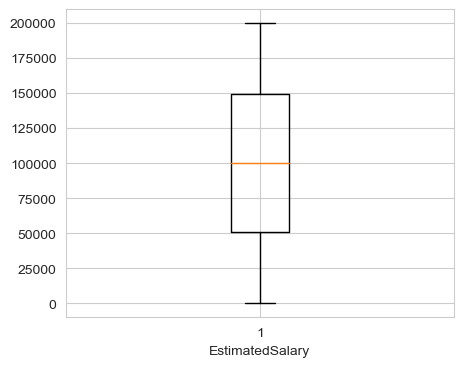

In [12]:
for i in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.set_style('whitegrid')
    plt.boxplot(df[i])
    plt.xlabel(i)

**INTERPRETATION: Some outliers can be observed in columns Credit score and Age which should not be removed.**

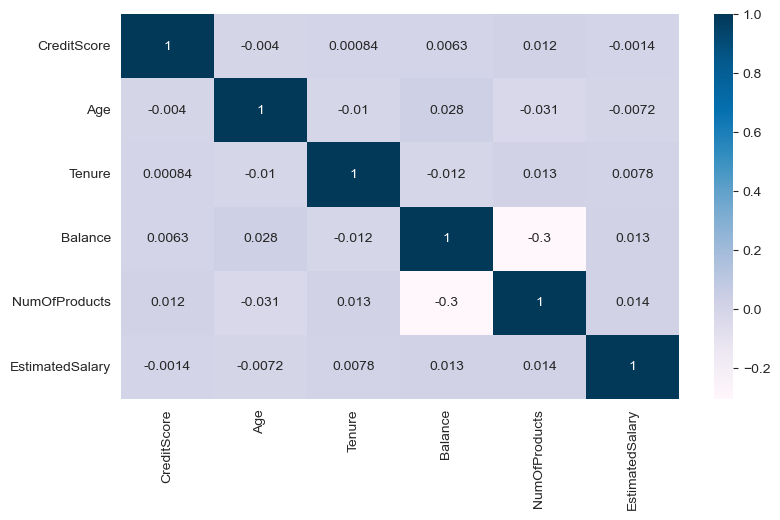

In [13]:
fig,ax = plt.subplots(figsize = (9,5))
sns.heatmap(num.corr(), annot=True, cmap="PuBu");

**INTERPRETATION: No significant correlation is observed.**

# Bivariate

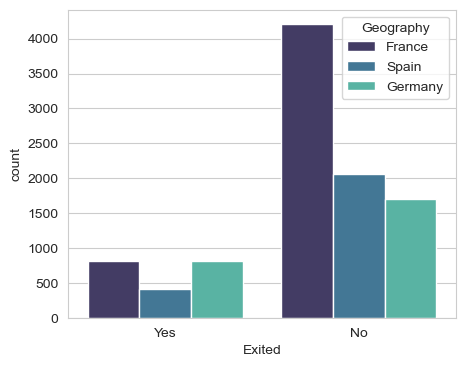

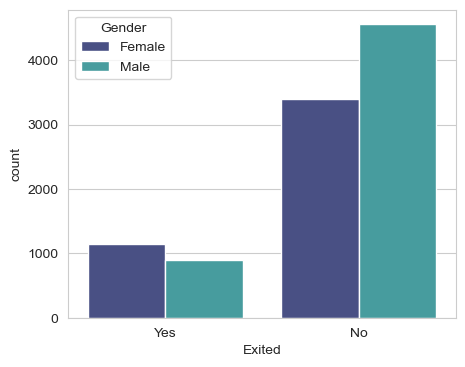

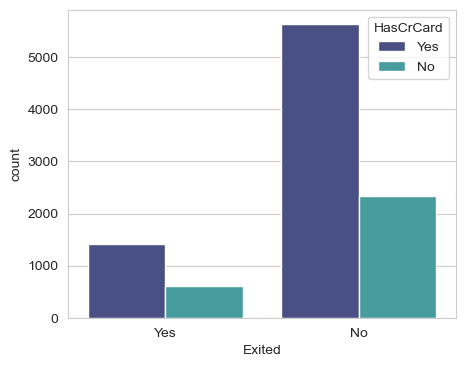

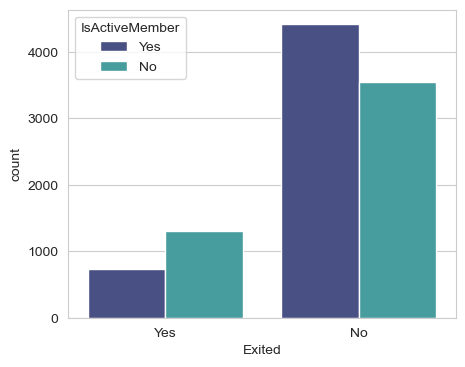

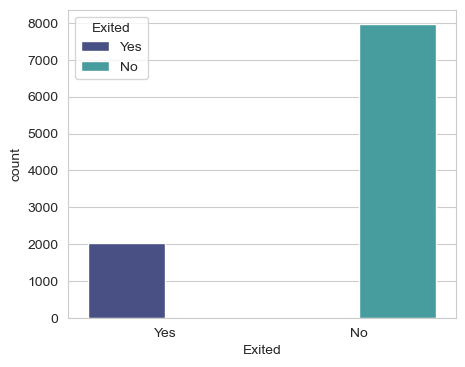

In [14]:
for i in cat:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.countplot(x=df["Exited"],hue=df[i], palette="mako")

**INTERPRETATION: Customers are mainly exitting from Germany and France. Mostly female customers are exitting. Most of exitting customers had a credit card. Customers who left were inactive.**

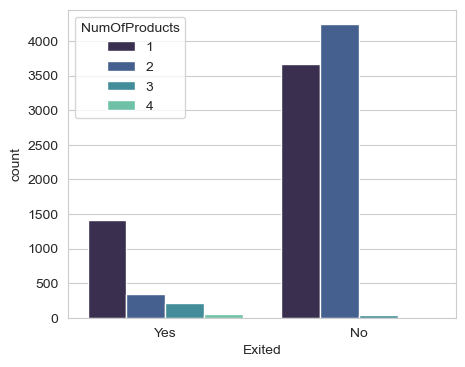

In [15]:
for i in ["NumOfProducts"]:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.countplot(x=df["Exited"], hue=df[i], palette="mako");

**INTERPRETATION: Most of the exitting customers had a tenure ranging between 1 to 9, have bought only 1 product were not active members.** 

# Multivariate

**Checking Historical Data**

In [16]:
df_exited = df[df["Exited"]=="Yes"]
df_exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
5,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
7,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
16,653,Germany,Male,58,1,132602.88,1,Yes,No,5097.67,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,Yes,Yes,53445.17,Yes
9982,655,Germany,Female,46,7,137145.12,1,Yes,No,115146.40,Yes
9991,597,France,Female,53,4,88381.21,1,Yes,No,69384.71,Yes
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes


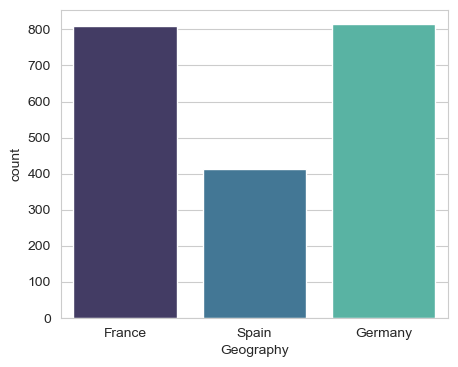

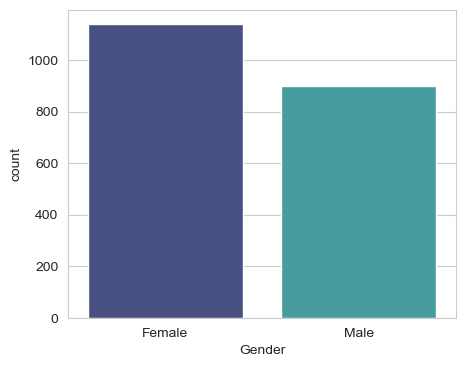

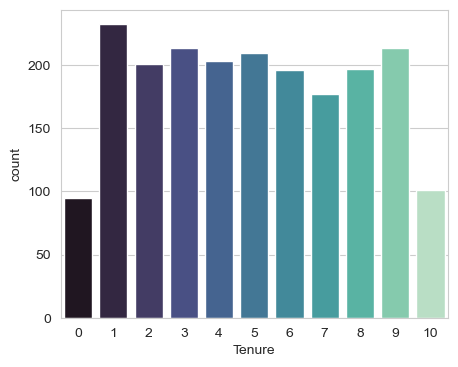

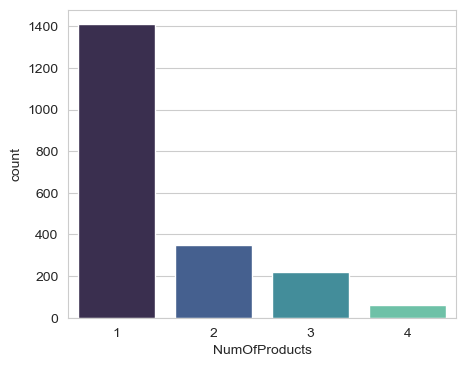

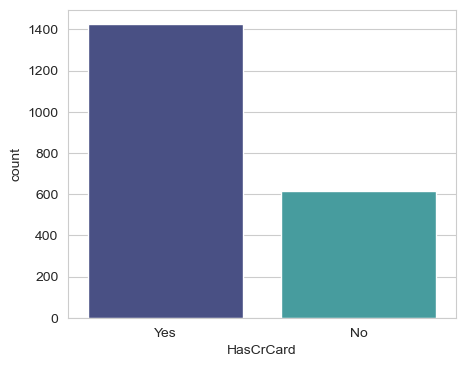

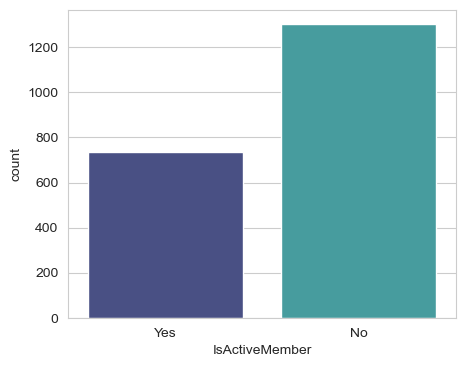

In [17]:
for i in ['Geography', 'Gender', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember',]:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.countplot(x=df_exited[i], palette="mako");

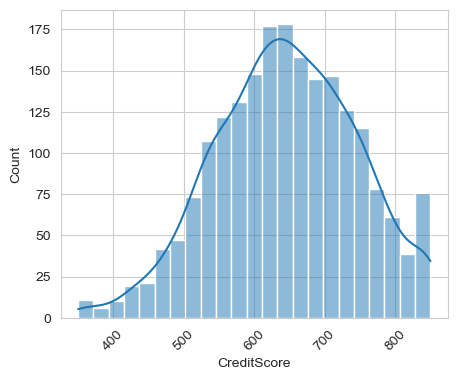

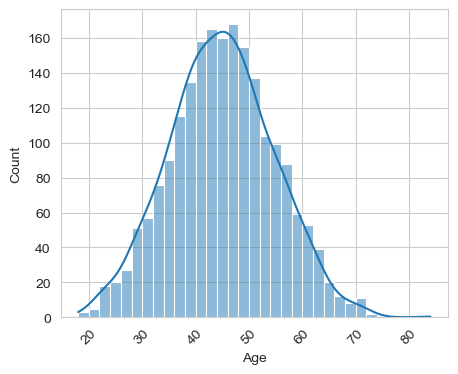

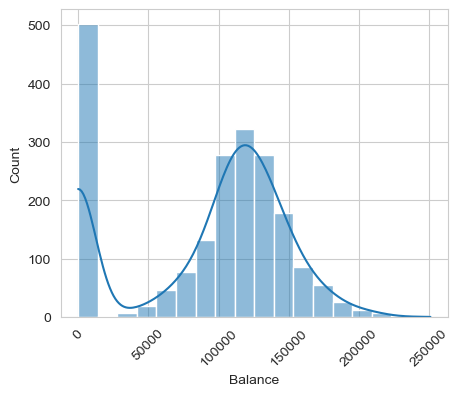

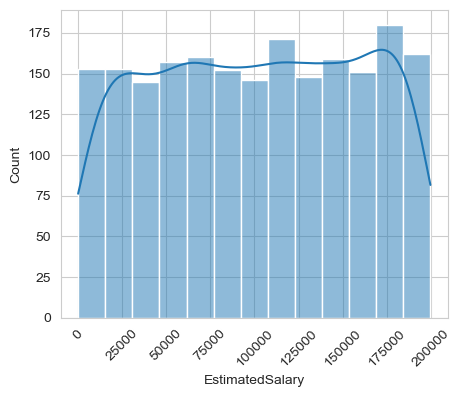

In [18]:
for i in ["CreditScore","Age","Balance","EstimatedSalary"]:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.histplot(df_exited[i], kde=True)
    plt.xticks(rotation=45);

In [19]:
df_exited[(df_exited["Geography"]=="Germany") & (df_exited["IsActiveMember"]=="No") & (df["NumOfProducts"]==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
16,653,Germany,Male,58,1,132602.88,1,Yes,No,5097.67,Yes
53,655,Germany,Male,41,8,125561.97,1,No,No,164040.94,Yes
54,601,Germany,Male,42,1,98495.72,1,Yes,No,40014.76,Yes
109,479,Germany,Male,35,9,92833.89,1,Yes,No,99449.86,Yes
118,524,Germany,Female,31,8,107818.63,1,Yes,No,199725.39,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9825,467,Germany,Male,28,10,126315.26,1,Yes,No,32349.29,Yes
9838,581,Germany,Male,39,1,121523.51,1,No,No,161655.55,Yes
9858,507,Germany,Male,40,3,120105.43,1,Yes,No,92075.01,Yes
9905,645,Germany,Male,41,2,93925.30,1,Yes,No,123982.14,Yes


In [20]:
df_exited[(df_exited["Geography"]=="France") & (df_exited["IsActiveMember"]=="No") & (df["NumOfProducts"]==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
35,475,France,Female,45,0,134264.04,1,Yes,No,27822.99,Yes
41,465,France,Female,51,8,122522.32,1,No,No,181297.65,Yes
43,834,France,Female,49,2,131394.56,1,No,No,194365.76,Yes
81,777,France,Female,32,2,0.00,1,Yes,No,136458.19,Yes
125,432,France,Male,42,9,152603.45,1,Yes,No,110265.24,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9799,653,France,Male,46,0,119556.10,1,Yes,No,78250.13,Yes
9809,820,France,Female,39,1,104614.29,1,Yes,No,61538.43,Yes
9898,589,France,Male,38,4,0.00,1,Yes,No,95483.48,Yes
9956,520,France,Female,46,10,85216.61,1,Yes,No,117369.52,Yes


**CONCLUSION: Customers belonging either from France or Germany and have bought only 1 product and are also not active members are mainly exitting the bank.**

**Predicting For Future**

In [21]:
df[(df["Exited"]=="No") & (df["Geography"]=="Germany") & (df["IsActiveMember"]=="No") & (df["NumOfProducts"]==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
57,725,Germany,Male,19,0,75888.20,1,No,No,45613.75,No
60,742,Germany,Male,35,5,136857.00,1,No,No,84509.57,No
66,581,Germany,Female,34,1,101633.04,1,Yes,No,110431.51,No
116,668,Germany,Female,37,6,167864.40,1,Yes,No,115638.29,No
140,756,Germany,Male,44,10,137452.09,1,Yes,No,189543.90,No
...,...,...,...,...,...,...,...,...,...,...,...
9942,739,Germany,Female,25,5,113113.12,1,Yes,No,129181.27,No
9952,724,Germany,Male,37,6,125489.40,1,Yes,No,118570.53,No
9963,740,Germany,Male,33,2,126524.11,1,Yes,No,136869.31,No
9965,627,Germany,Female,33,4,83199.05,1,No,No,159334.93,No


In [22]:
df[(df["Exited"]=="No") & (df["Geography"]=="France") & (df["IsActiveMember"]=="No") & (df["NumOfProducts"]==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
56,656,France,Male,45,5,127864.40,1,Yes,No,87107.57,No
69,675,France,Female,21,8,98373.26,1,Yes,No,18203.00,No
71,813,France,Male,29,6,0.00,1,Yes,No,33953.87,No
102,738,France,Male,31,9,82674.15,1,Yes,No,41970.72,No
112,562,France,Male,42,2,100238.35,1,No,No,86797.41,No
...,...,...,...,...,...,...,...,...,...,...,...
9974,583,France,Male,33,7,122531.86,1,Yes,No,13549.24,No
9976,637,France,Female,33,7,103377.81,1,Yes,No,84419.78,No
9983,613,France,Male,40,4,0.00,1,No,No,151325.24,No
9993,644,France,Male,28,7,155060.41,1,Yes,No,29179.52,No


**INTERPRETATION: Existing customers belonging to Germany or France who have bought only 1 product and are not an active member of the bank anymore are likely to leave soon.**

# Feature Engineering

In [23]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [24]:
le = preprocessing.LabelEncoder()
sc = StandardScaler()

In [25]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,Yes,Yes,101348.88,Yes


In [26]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [27]:
for i in ["Geography","Gender","HasCrCard","IsActiveMember","Exited"]:
    df[i] = df[i].astype('category')
    df[i] = le.fit_transform(df[i])

In [28]:
for i in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    df[i] = sc.fit_transform(df[i].to_numpy().reshape(-1,1))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = df.loc[:,["Exited"]]
x = df.iloc[:,:-1]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# Base Model - Naive Bayes

In [32]:
df["Exited"].value_counts()  # Highly imbalanced data

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [34]:
nb = GaussianNB()
nb.fit(x_train, y_train)
round(nb.score(x_train, y_train)*100,2)

82.56

In [35]:
y_pred = nb.predict(x_test)                       # Highly overfitted model
print(round(f1_score(y_test, y_pred)*100,2))

37.17


# Bagging - Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [37]:
rfc = RandomForestClassifier(oob_score = True)

In [38]:
rskf = RepeatedStratifiedKFold(n_splits=3)

parameters = {
    "max_depth" : [20,25,30],
    "n_estimators" : [50,100,200]
}

In [39]:
grid_search = GridSearchCV(rfc, param_grid= parameters, cv=rskf, scoring = "f1_weighted")

In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(oob_score=True),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted')

In [41]:
grid_search.best_score_

0.841460229869511

In [42]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, oob_score=True)

# Final Model

In [43]:
rfc_best = RandomForestClassifier(max_depth=20, oob_score=True)

In [44]:
rfc_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, oob_score=True)

In [45]:
rskf = RepeatedStratifiedKFold(n_splits = 3)
print(cross_val_score(rfc_best,x,y, cv=rskf, scoring='f1_weighted').mean()) # training score

0.8460983281779947


In [46]:
print(rfc_best.oob_score_)  # testing score

0.8562857142857143


In [47]:
y_pred_rfc_best = rfc_best.predict(x_test)
y_pred_rfc_best

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
pd.DataFrame(y_pred_rfc_best).value_counts()

0    2645
1     355
dtype: int64

# Stacking

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
def get_stacking():
    base = list()
    
    # Base models
    base.append(("dtc",DecisionTreeClassifier()))
    base.append(("nb",GaussianNB()))
    base.append(("svc",SVC()))
    
    # meta model
    meta = LogisticRegression()
    
    # Ensemble (stacking)
    st = StackingClassifier(estimators=base, final_estimator=meta)
    
    print("base",base)
    
    return st

In [51]:
st_model = get_stacking()
st_model

base [('dtc', DecisionTreeClassifier()), ('nb', GaussianNB()), ('svc', SVC())]


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('nb', GaussianNB()), ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [52]:
cross_val_score(st_model, x,y, cv=40, scoring="f1_weighted").mean()

0.8368772209059625

**CONCLUSION: Bagging with Random forest and Stacking doesn't show any significant differences. Hence finalizing Bagging as it is a comparatively faster algorithm.**

# USER INPUT

In [53]:
df_main = df2.iloc[:8,:-1]
details = []

for CreditScore in range(0,50):
    CreditScore = int(input("Enter credit score: "))
    if CreditScore<=999 and CreditScore>=0:
        details.append(CreditScore)
        break
    else:
        print("Invalid entry. Please enter correct Credit Score.")
        
for Geography in range(0,50):
    geo = str(input("Enter Country name [France, Germany, Spain]: "))
    if geo in ["France","Germany","Spain"]:
        details.append(geo)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for gender in range(0,50):
    gen = str(input("Enter gender [Male / Female]: "))
    if gen in ["Male","Female"]:
        details.append(gen)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for age in range(0,50):
    age = int(input("Enter age: "))
    if age>=18 and age<=100:
        details.append(age)
        break
    else:
        print("Invalid entry. Please enter correct Age.")
        
for tenure in range(0,50):
    tenure = int(input("Enter tenure period between 0 and 10: "))
    if tenure>=0 and tenure<=10:
        details.append(tenure)
        break
    else:
        print("Invalid entry. Please enter within the given range.")
        
for Balance in range(0,50):
    Balance = float(input("Enter a/c balance amount: "))
    if Balance>=0 and Balance<=251000:
        details.append(Balance)
        break
    else:
        print("Invalid entry. Please enter proper balance amount.")
        
for NumOfProducts in range(0,50):
    NumOfProducts = int(input("Enter number of products [1, 2, 3, 4]: "))
    if NumOfProducts>=1 and NumOfProducts<=4:
        details.append(NumOfProducts)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for HasCrCard in range(0,50):
    HasCrCard = str(input("Credit card holder [Yes / No]: "))
    if HasCrCard=="Yes" or HasCrCard=="No":
        details.append(HasCrCard)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for IsActiveMember in range(0,50):
    active = str(input("Active customer [Yes / No]: "))
    if active in ["Yes","No"]:
        details.append(active)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for sal in range(0,50):
    sal = float(input("Enter salary: "))
    if sal>=10 and sal<=200000:
        details.append(sal)
        break
    else:
        print("Invalid entry. Please enter correct Salary amount.")
        
        
        
details_tab = pd.DataFrame([details], columns=["CreditScore","Geography","Gender","Age", 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
details_tab = pd.concat([df_main,details_tab], axis = 0)

print(" ")
print("*"*100)
print("Customer Details:")
print(details_tab.iloc[-1:,:].values.tolist())

for i in details_tab.select_dtypes(exclude='number'):
    details_tab[i] = details_tab[i].astype('category')
    details_tab[i] = le.fit_transform(details_tab[i])

print(details_tab.iloc[-1:,:].values.tolist())
    
for i in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    details_tab[i] = sc.transform(details_tab[i].to_numpy().reshape(-1,1))
    
predict = details_tab.iloc[-1:,:]
print(" ")
print("*"*100)
print("*"*100)

if rfc_best.predict(predict)==1:
    print("This customer is likely to leave")
else:
    print("This customer is likely to stay")

Enter credit score: 200
Enter Country name [France, Germany, Spain]: France
Enter gender [Male / Female]: Male
Enter age: 23
Enter tenure period between 0 and 10: 8
Enter a/c balance amount: 20000
Enter number of products [1, 2, 3, 4]: 1
Credit card holder [Yes / No]: Yes
Active customer [Yes / No]: Yes
Enter salary: 20000
 
****************************************************************************************************
Customer Details:
[[200, 'France', 'Male', 23, 8, 20000.0, 1, 'Yes', 'Yes', 20000.0]]
[[200.0, 0.0, 1.0, 23.0, 8.0, 20000.0, 1.0, 1.0, 1.0, 20000.0]]
 
****************************************************************************************************
****************************************************************************************************
This customer is likely to stay
